Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE - Prepare a Dataset for LSTM and CNN
<hr> | <hr>
<u>**CPE019 Hands-on Activity (2nd Sem, A.Y. 2023-2024)** | **Hands-on Activity 11.1**
**Name** | Cortez, Angelica
**Section** | CPE32S3
**Schedule**: |Wednesday - 10:30am - 1:30pm
**Date Performed**: |05/05/2024
**Date Submitted**: |05/11/2024
**Instructor**: | Engr.Roman Richard
<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Load the dataset and examine it

In [ ]:
 # load dataset

def ibm_dataset(file_path):
  ibm_df = pd.read_csv(file_path)
  return ibm_df

def parser(X):
  return datetime.strptime(X, '%Y-%m')

ibm_df = ibm_dataset("/content/drive/MyDrive/Colab Notebooks/IBM_2006-01-01_to_2018-01-01.csv")
print(ibm_df)

            Date    Open    High     Low   Close    Volume Name
0     2006-01-03   82.45   82.55   80.81   82.06  11715200  IBM
1     2006-01-04   82.20   82.50   81.33   81.95   9840600  IBM
2     2006-01-05   81.40   82.90   81.00   82.50   7213500  IBM
3     2006-01-06   83.95   85.03   83.41   84.95   8197400  IBM
4     2006-01-09   84.10   84.25   83.38   83.73   6858200  IBM
...          ...     ...     ...     ...     ...       ...  ...
3015  2017-12-22  151.82  153.00  151.50  152.50   2990583  IBM
3016  2017-12-26  152.51  153.86  152.50  152.83   2479017  IBM
3017  2017-12-27  152.95  153.18  152.61  153.13   2149257  IBM
3018  2017-12-28  153.20  154.12  153.20  154.04   2687624  IBM
3019  2017-12-29  154.17  154.72  153.42  153.42   3327087  IBM

[3020 rows x 7 columns]


In [ ]:
print(ibm_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB
None


In [ ]:
print(ibm_df.shape)

(3020, 7)


***ANALYSIS:***

Based on the dataset, I imported necessary libraries like Pandas, NumPy, and Matplotlib, loads a dataset of IBM stock prices, and prints out the first few rows and information about the dataset. The dataset contains 3020 rows and 7 columns, showing stock details like Open, High, Low, Close, and Volume, from 2006 to 2017.

# Check for missing values.

In [ ]:
# check for missing values
print(ibm_df.isnull().sum())

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


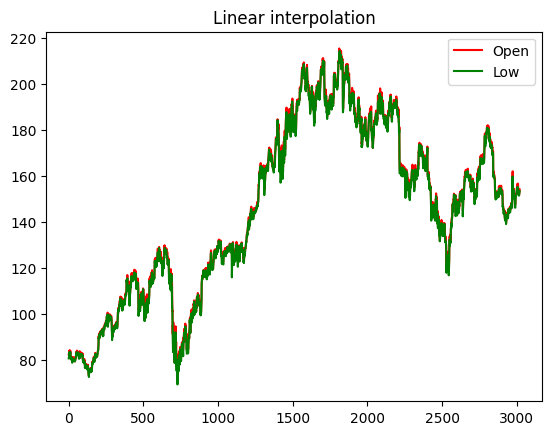

In [ ]:
# impute missing values using rolling window method
ibm_df['Open'] = ibm_df['Open'].interpolate(method='linear', limit_direction='both')
ibm_df['Low'] = ibm_df['Low'].interpolate(method='linear', limit_direction='both')

plt.plot(ibm_df['Open'], color='red', label='Open')
plt.plot(ibm_df['Low'], color='green', label='Low')
plt.title('Linear interpolation')
plt.legend()
plt.show()

In [ ]:
# check if the missing values changed
print(ibm_df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


***ANALYSIS:***

In checking for missing values, The 'Open' and 'Low' columns have missing values, As shown in the graph, I filled them using linear interpolation. The used of that is to estimates the unknown value in the same increasing order from previous values. After plotting the interpolated values, I checked again for missing values and found none. This ensures that the dataset is ready for analysis without any gaps in the data.

# Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)

In [ ]:
# convert 'Date' column to datetime format
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'])

# split data for training set (before 2017) and test set (2017 and beyond)
train_set = ibm_df[ibm_df['Date'] < '2017-01-01']
test_set = ibm_df[ibm_df['Date'] >= '2017-01-01']

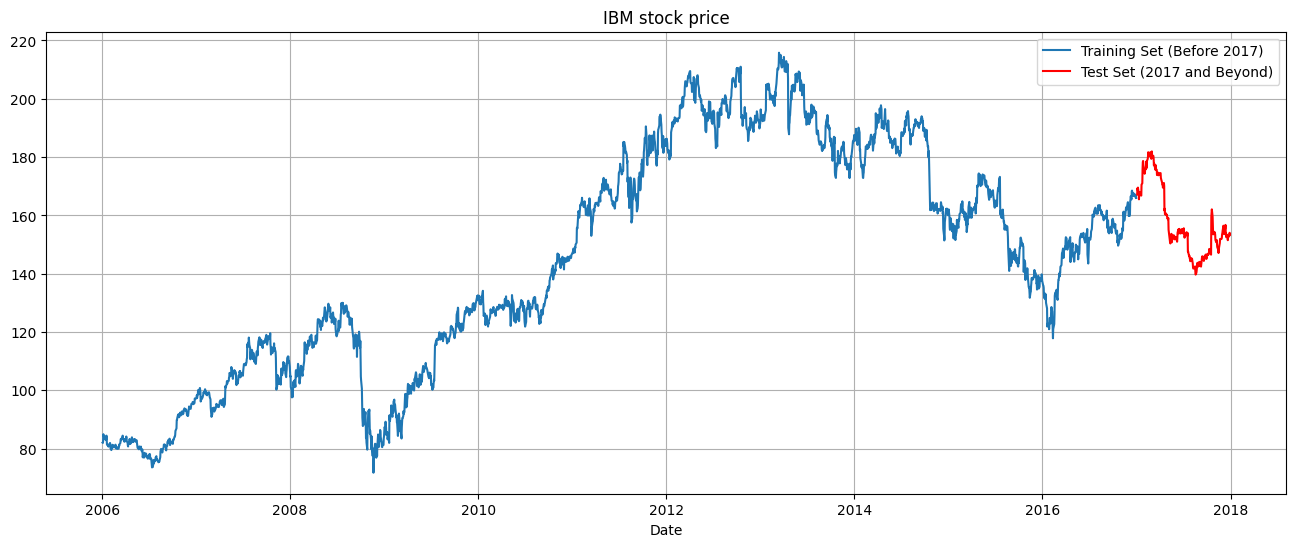

In [ ]:
# plotting the training set
plt.figure(figsize=(16, 6))
plt.plot(train_set['Date'], train_set['Close'], label='Training Set (Before 2017)')
plt.title('IBM stock price')
plt.xlabel('Date')
plt.legend()
plt.grid(True)

# plotting the test set
plt.plot(test_set['Date'], test_set['Close'], label='Test Set (2017 and Beyond)', color='red')
plt.legend()
plt.show()

***ANALYSIS:***

In splitting the data, the first thing I've do is to convert the 'Date' column to datetime format and splits the data into a training set (before 2017) and a test set (from 2017 onwards). Then, it plots the IBM stock prices for both sets separately, making it easy to visualize and compare the performance of the model trained on the training set with the actual data from the test set.

# Scale the training set from 0 to 1. Use MinMaxScaler and fit_transform function to do this.

In [ ]:
# exclude the 'Date' column from scaling
ibm_df = ibm_df.set_index('Date')
ibm_df = ibm_df.iloc[:, :-1]

# use minmaxscaler
scaler = MinMaxScaler(feature_range=(0, 1))
ibm_df_scaled = scaler.fit_transform(ibm_df)

***ANALYSIS:***

In this part, I've first remove the 'Date' column and scales the remaining data using MinMaxScaler, which transforms the values from 0 to 1. This preprocessing step ensures that all features have a similar scale, which can improve the performance of machine learning models trained on the data.

# LSTM stores long-term memory states. To do this, create a data structure with 60 timesteps and 1 output. Thus, for each element of the training set, we shall have 60 previous training set elements.

In [ ]:
def split_sequence(ibm_df, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(ibm_df)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # check if we are beyond the sequence
        if out_end_ix > len(ibm_df):
            break

        # gather input and output parts of the pattern
        seq_x = ibm_df.iloc[i:end_ix, 1:].values
        seq_y = ibm_df.iloc[end_ix - 1, -2]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Split sequence for training data
n_steps_in, n_steps_out = 60, 1  # 60 timesteps and 1 output
X_train, y_train = split_sequence(train_set, n_steps_in, n_steps_out)
print(X_train.shape, y_train.shape)

(2709, 60, 6) (2709,)


***ANALYSIS:***

By doing this part, as we can see in the code that it defines a function to split a time series dataset into input sequences and corresponding output values. It then applies this function to the training set, creating input sequences with 60 timesteps and 1 output value. The result shows that there are 2709 sequences, each consisting of 60 timesteps and containing 6 features, along with 2709 corresponding output values.

# Reshape the X_train for efficient modeling

In [ ]:
samples = []
timesteps = 60
n_features = X_train.shape[2]
for i in range(len(X_train) - timesteps):
    # creating 60 previous training set elements
    sample = X_train[i:i + timesteps]
    samples.append(sample)
X_train_reshaped = np.array(samples)
print("Reshaped X_train shape:", X_train_reshaped.shape)

Reshaped X_train shape: (2649, 60, 60, 6)


***ANALYSIS:***

Lastly, the code shows that it reshapes the training input data to fit a model by creating samples with 60 timesteps and 60 features for each timestep. This reshaped format is suitable for deep learning, where the input shape typically includes the number of samples, timesteps, features, and channels. The result indicates that there are 2649 samples, each with 60 timesteps, 60 features, and 6 channels.

# CONCLUSION/LEARNINGS

In preparing a dataset for LSTM and CNN, it helped me understand the process of preparing and analyzing time series data, specifically for predicting IBM stock prices. I learned about data preprocessing techniques such as handling missing values, scaling features, and reshaping data for different types of machine learning models like RNNs and CNNs. By splitting the data into training and test sets, and then creating sequences with appropriate timesteps, I gained insights into how to effectively train models to make accurate predictions. Overall, this experience provided me with valuable practical knowledge about handling and analyzing time series data, which can be applied to various real-world scenarios in the field of computer engineering.